In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Daten Reihe der Erarbeitung 1958 – 1987

In [2]:
# Import or assign API key
api_key = 'd9ce385a3f807aaba9590769b5f994a1'

In [56]:
# Setting the data urls:
# GDP Daten von den vereinigten Staaten

m1_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=M1SL&api_key={api_key}&file_type=json&frequency=a'
GDP_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key={api_key}&file_type=json&frequency=a'
GDP_per_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key={api_key}&file_type=json&frequency=a&units=pch'
OIL_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=POILBREUSDM&api_key={api_key}&file_type=json&frequency=a'
CPI_dataURL = f'https://api.stlouisfed.org/fred/series/observations?series_id=MEDCPIM158SFRBCLE&api_key={api_key}&file_type=json&frequency=a'
print(GDP_per_dataURL)

https://api.stlouisfed.org/fred/series/observations?series_id=GDP&api_key=d9ce385a3f807aaba9590769b5f994a1&file_type=json&frequency=a&units=pch


In [4]:
import requests
import json
import pandas as pd

# Setzen Sie Ihren API-Schlüssel hier ein

def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        observations = []
        for observation in data['observations']:
            date = observation['date']
            value = observation['value']
            if value != '.':
                value = float(value)
                observations.append({'Date': date, 'Value': value})
        df = pd.DataFrame(observations)
        return df
    else:
        print(f'Error: {response.status_code}')
        return None

In [57]:
df_GDP = get_data(GDP_dataURL)
df_oil = get_data(OIL_dataURL)
df_cpi = get_data(CPI_dataURL)
df_m1 = get_data(m1_dataURL)
df_GDP_per = get_data(GDP_per_dataURL)

,Date,Value
0,1948-01-01,9.95621
1,1949-01-01,-0.72595
2,1950-01-01,10.03834
3,1951-01-01,15.70438
4,1952-01-01,5.88836
...,...,...
71,2019-01-01,4.18696
72,2020-01-01,-0.92208
73,2021-01-01,10.65088
74,2022-01-01,9.11280


In [60]:
df_GDP['Year'].min(), df_oil['Year'].min(), df_cpi['Year'].min(), df_m1['Year'].min(), df_GDP_per['Year'].min()

KeyError: 'Year'

In [61]:
df_m1.rename(columns={'Value': 'M1'}, inplace=True)
df_oil.rename(columns={'Value': 'Oil_price'}, inplace=True)
df_cpi.rename(columns={'Value': 'CPI Index'}, inplace=True)
df_GDP.rename(columns={'Value': 'GDP'}, inplace=True)
df_GDP_per.rename(columns={'Value': 'GDP Change in %'}, inplace=True)


In [62]:
def df_to_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    
    return df

def change_year_format(df):
    df['Year'] = df['Date'].dt.strftime('%Y')
    df = df.drop(columns=['Date'])
    return df

df_GDP = df_to_datetime(df_GDP)
df_oil = df_to_datetime(df_oil)
df_cpi = df_to_datetime(df_cpi)
df_m1 = df_to_datetime(df_m1)
df_GDP_per = df_to_datetime(df_GDP_per)

df_GDP = change_year_format(df_GDP)
df_oil = change_year_format(df_oil)
df_cpi = change_year_format(df_cpi)
df_m1 = change_year_format(df_m1)
df_GDP_per = change_year_format(df_GDP_per)



In [63]:
df_GDP_per

,GDP Change in %,Year
0,9.95621,1948
1,-0.72595,1949
2,10.03834,1950
3,15.70438,1951
4,5.88836,1952
...,...,...
71,4.18696,2019
72,-0.92208,2020
73,10.65088,2021
74,9.11280,2022


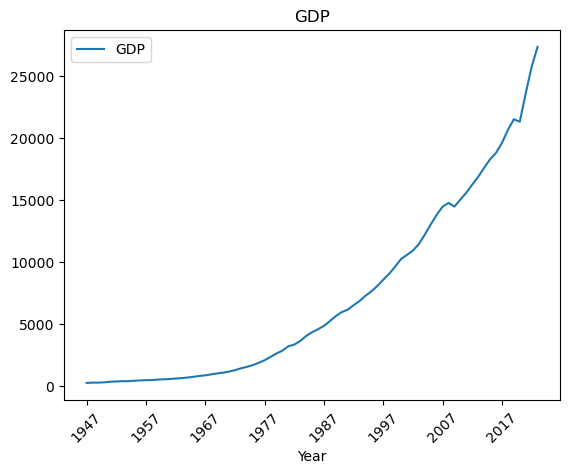

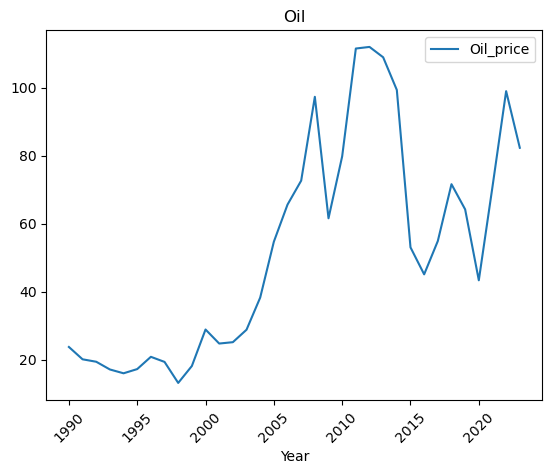

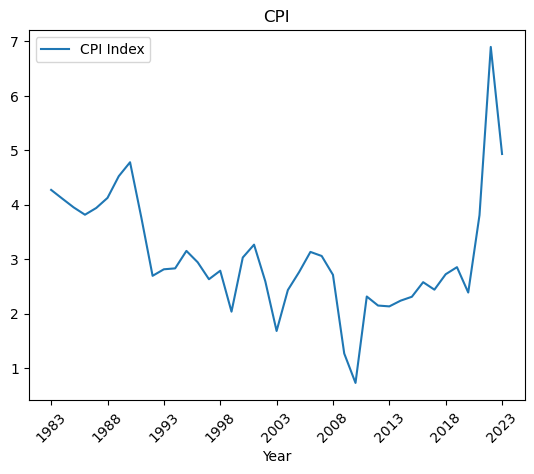

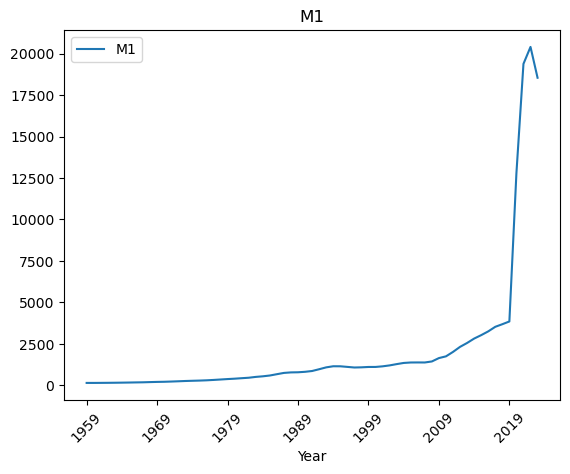

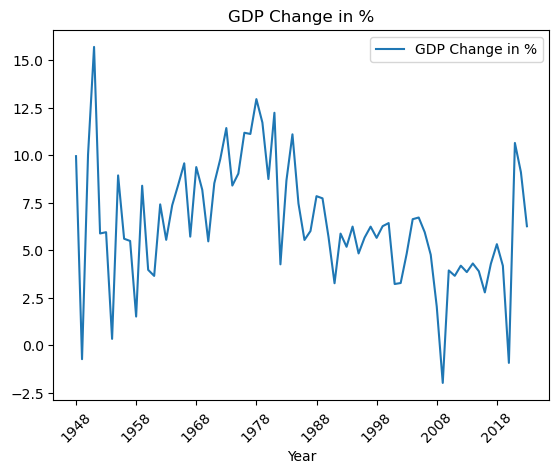

In [64]:
def plot(df, title, column):
    df.plot(x='Year', y=column, kind='line', title=title)
    plt.xticks(rotation=45)
    plt.show()

plot(df_GDP, 'GDP', 'GDP')
plot(df_oil, 'Oil', 'Oil_price')
plot(df_cpi, 'CPI', 'CPI Index')
plot(df_m1, 'M1', 'M1')
plot(df_GDP_per, 'GDP Change in %', 'GDP Change in %')

In [65]:
# Merge DataFrames basierend auf der 'Date'-Spalte
merged_df = pd.merge(df_GDP, df_oil, on='Year')
merged_df = pd.merge(merged_df, df_cpi, on='Year')
merged_df = pd.merge(merged_df, df_m1, on='Year')
merged_df = pd.merge(merged_df, df_GDP_per, on='Year')

# Ausgabe des zusammengeführten DataFrames
merged_df.head()

,GDP,Year,Oil_price,CPI Index,M1,GDP Change in %
0,5963.145,1990,23.706614,4.780442,810.6,5.69991
1,6158.129,1991,20.075370,3.765557,859.0,3.26983
2,6520.327,1992,19.358238,2.693868,965.9,5.88162
3,6858.559,1993,17.084759,2.813860,1078.4,5.18734
4,7287.237,1994,15.959658,2.830597,1145.2,6.25026


In [66]:
merged_df.corr()

,GDP,Year,Oil_price,CPI Index,M1,GDP Change in %
GDP,1.000000,0.984256,0.704011,0.232152,0.762033,0.026324
Year,0.984256,1.000000,0.732245,0.081342,0.663952,-0.068740
Oil_price,0.704011,0.732245,1.000000,0.024354,0.360656,-0.068618
CPI Index,0.232152,0.081342,0.024354,1.000000,0.607381,0.517746
M1,0.762033,0.663952,0.360656,0.607381,1.000000,0.325132
GDP Change in %,0.026324,-0.068740,-0.068618,0.517746,0.325132,1.000000


/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

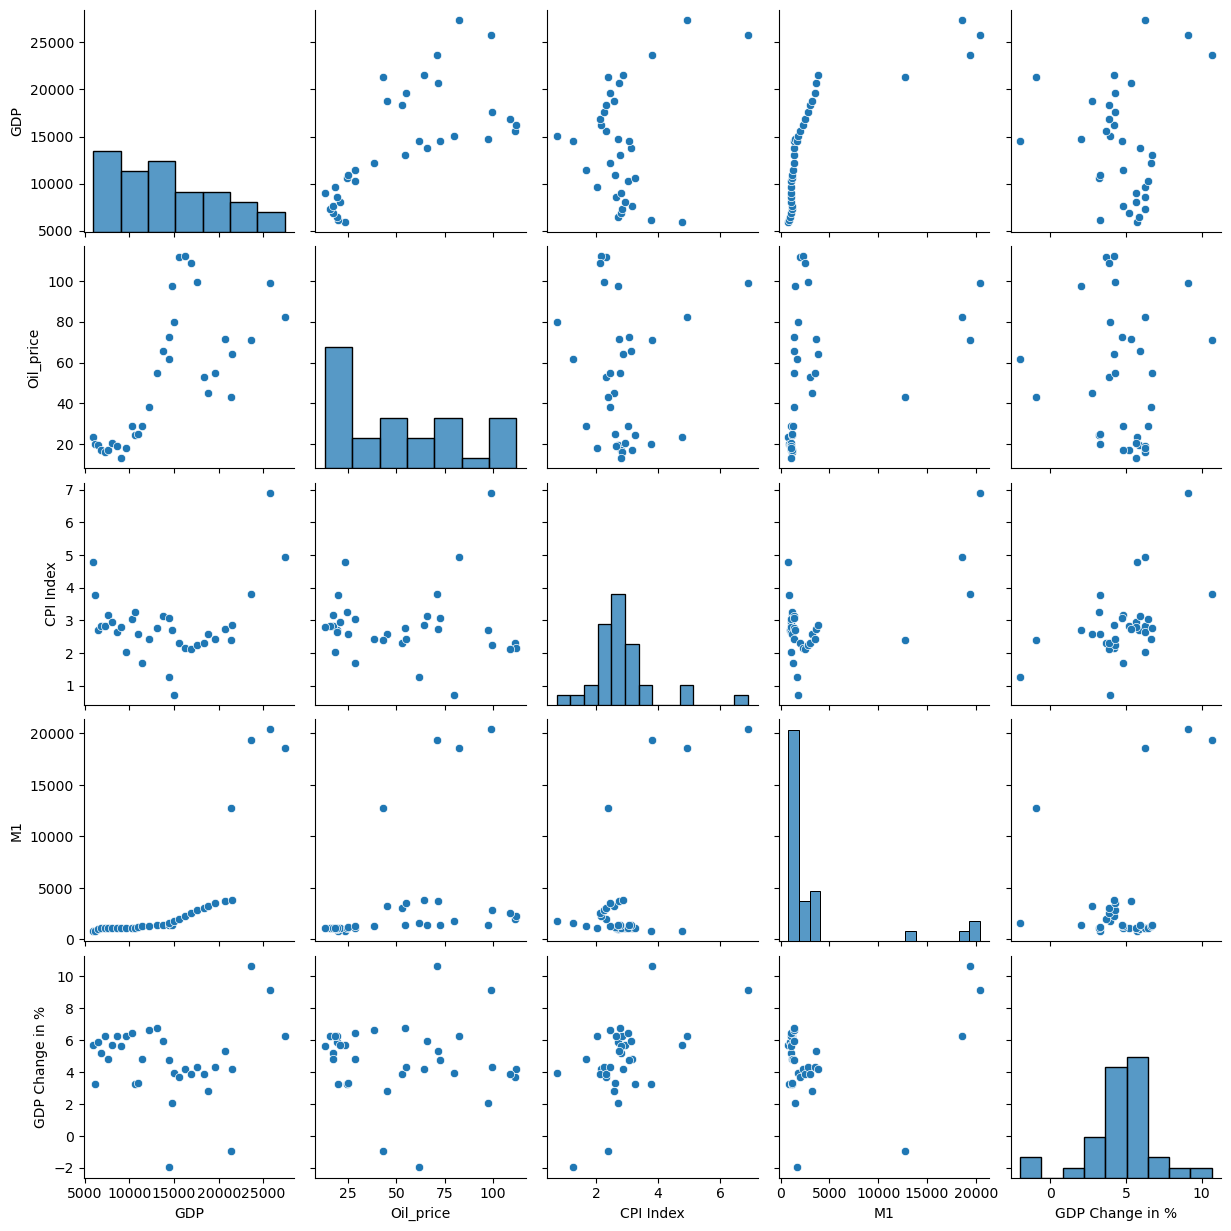

In [67]:
sns.pairplot(merged_df)


# Lineare Regression 

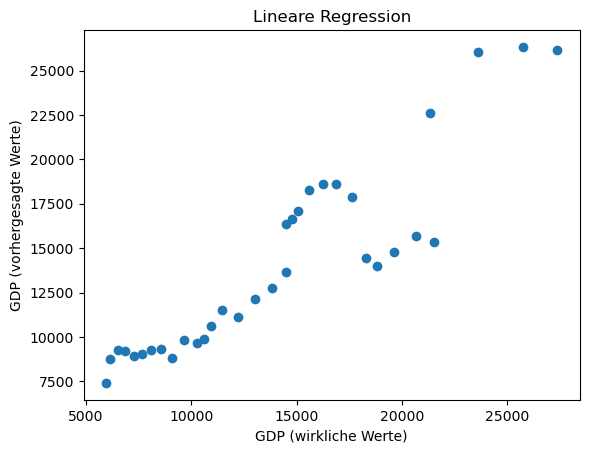

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Ausgabe des zusammengeführten DataFrames
#print(merged_df)

# Aufteilen der Daten in abhängige und unabhängige Variablen
y = merged_df['GDP']
X = merged_df.drop(columns=['GDP', 'Year'])

# Trainieren des linearen Regressionsmodells
model = LinearRegression()
model.fit(X, y)

# Generiere Vorhersagen
X_new = np.array([[0], [2]])  # Beispielsweise
y_pred = model.predict(X)

# Visualisierung der Daten und der Regressionsgeraden
plt.scatter(y, y_pred)
plt.xlabel("GDP (wirkliche Werte)")
plt.ylabel("GDP (vorhergesagte Werte)")
plt.title("Lineare Regression")
plt.show()


In [69]:
# Bestimmen der Metriken
r_squared = model.score(X, y)
intercept = model.intercept_
slope = model.coef_

print("R² Score:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)


R² Score: 0.8292905821177223
Intercept: 11034.603607855817
Slope: [ 7.86904850e+01 -1.01153560e+03  8.12641926e-01 -2.30165818e+02]


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Vorhersagen basierend auf den trainierten Modell
y_pred = model.predict(X)

# Berechnen der Metriken
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1859.3771858129296
Mean Squared Error (MSE): 5718077.557883844
Root Mean Squared Error (RMSE): 2391.2502081304337


In [71]:
import statsmodels.api as sm

X = sm.add_constant(X)

# Durchführen der linearen Regression
model = sm.OLS(y, X)
results = model.fit()

# Ausgabe der Regressionsergebnisse
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     35.22
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           9.61e-11
Time:                        08:48:18   Log-Likelihood:                -312.75
No. Observations:                  34   AIC:                             635.5
Df Residuals:                      29   BIC:                             643.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.103e+04   1789.688     

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Berechnung der VIFs
vif_data = X.copy()  # Kopie der unabhängigen Variablen
vif_data = vif_data.drop(columns=['const'])  # Entfernen der Konstante
vif = pd.DataFrame()
vif["Variable"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Ausgabe der VIFs
print(vif)


          Variable       VIF
0        Oil_price  2.934890
1        CPI Index  9.301522
2               M1  2.054179
3  GDP Change in %  6.840563
